In [48]:
import eikon as ek
import pandas as pd
from IPython.display import display
from sklearn.linear_model import LinearRegression
import yfinance as yf
import datetime
import numpy as np
from pandas_datareader import data, wb
import datetime
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import Image
#from pyportfolioopt import EfficientFrontier

In [49]:
# Set the app key for the Eikon Data API
ek.set_app_key('9adad85308924cb9b9a82d6a70b4f23884411895')

In [50]:
# Define the tickers
tickers = ['.dMIUS00000PUS', '.dMIEC00000PUS', '.dMIJP00000PUS', '.dMIPCJ0000NUS', '.dMILA00000PUS', 'IYW', 'XSD' ]

In [51]:
# Set the start and end dates for the data you want to retrieve
start_date = '2017-12-01'
end_date = '2022-12-01'

In [52]:
# Set the frequency for the data you want to retrieve (in this case, monthly)
frequency = 'monthly'

In [53]:
# Initialize an empty data frame to store the data
price_df = pd.DataFrame()

In [54]:
# Loop through each ticker and retrieve the data using the Eikon API
for ticker in tickers:
  data = ek.get_timeseries(ticker, fields='Close', start_date=start_date, end_date=end_date, interval=frequency)
  price_df = pd.concat([price_df, data], ignore_index=True, axis=1)

In [55]:
# Set the tickers as the headers for the data frame
price_df.columns = tickers

In [56]:
# Print the resulting data frame
price_df.head()

,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Date,,,,,,,
2017-12-31,2544.58,439.048,3435.119,6382.282,2828.146,40.6925,69.81
2018-01-31,2687.942,463.474,3592.392,6628.286,3197.957,43.62,73.4
2018-02-28,2583.866,435.033,3537.143,6410.806,3067.524,43.7975,71.24
2018-03-31,2516.933,428.939,3435.606,6144.015,3032.91,42.0525,70.06
2018-04-30,2524.279,440.501,3458.471,6335.345,2987.533,42.0025,67.07


In [57]:
# Calculate the monthly returns for each index
returns_df = price_df.pct_change()

In [58]:
returns_df.head()

,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Date,,,,,,,
2017-12-31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2018-01-31,0.05634,0.055634,0.045784,0.038545,0.130761,0.071942,0.051425
2018-02-28,-0.03872,-0.061365,-0.015379,-0.032811,-0.040786,0.004069,-0.029428
2018-03-31,-0.025904,-0.014008,-0.028706,-0.041616,-0.011284,-0.039842,-0.016564
2018-04-30,0.002919,0.026955,0.006655,0.031141,-0.014962,-0.001189,-0.042678


In [59]:
# Calculate the mean and standard deviation for each column
stats_df = returns_df.apply(lambda x: [x.mean(), x.std()])
stats_df.index = ['Mean', 'Standard Deviation']

In [60]:
stats_df.head()

,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Mean,0.008616,0.000837,-0.000524,0.003444,0.000202,0.013928,0.020573
Standard Deviation,0.054460,0.061172,0.045551,0.058064,0.089174,0.065194,0.088286


In [61]:
# Compute the variance-covariance matrix
vcov = returns_df.cov()

In [62]:
# Highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

vcov = vcov.rename(columns={'.dMIUS00000PUS': 'MSCI US', 
                        '.dMIEC00000PUS': 'MSCI EU',
                        '.dMIJP00000PUS': 'MSCI Japan',
                        '.dMIPCJ0000NUS': 'MSCI Pacific ex JPN',
                        '.dMILA00000PUS': 'MSCI EM Latin America'
                        })

vcov = vcov.rename(index={'.dMIUS00000PUS': 'MSCI US', 
                        '.dMIEC00000PUS': 'MSCI EU',
                        '.dMIJP00000PUS': 'MSCI Japan',
                        '.dMIPCJ0000NUS': 'MSCI Pacific ex JPN',
                        '.dMILA00000PUS': 'MSCI EM Latin America'
                        })

# Display the data frame as a table
display(vcov.style.apply(highlight_max))

,MSCI US,MSCI EU,MSCI Japan,MSCI Pacific ex JPN,MSCI EM Latin America,IYW,XSD
MSCI US,0.002966,0.002944,0.002029,0.002626,0.002952,0.003314,0.004013
MSCI EU,0.002944,0.003742,0.002353,0.003093,0.003803,0.003060,0.003943
MSCI Japan,0.002029,0.002353,0.002075,0.002083,0.002241,0.002254,0.003087
MSCI Pacific ex JPN,0.002626,0.003093,0.002083,0.003371,0.003459,0.002805,0.003738
MSCI EM Latin America,0.002952,0.003803,0.002241,0.003459,0.007952,0.002558,0.003438
IYW,0.003314,0.003060,0.002254,0.002805,0.002558,0.004250,0.004955
XSD,0.004013,0.003943,0.003087,0.003738,0.003438,0.004955,0.007794


In [63]:
#Retrieve risk-free interest rate from Yahoo Finance
def get_current_price(symbol):
    ticker = yf.Ticker(symbol)
    todays_data = ticker.history(period='3d')
    return todays_data['Close'][0]

rf = get_current_price('^TNX')/100
print(rf)

0.03859999895095825


In [64]:
#World index data
ticker_world = ['.MIWO00000PUS']

world_df = pd.DataFrame()
world_data = ek.get_timeseries(ticker_world, fields='Close', start_date=start_date, end_date=end_date, interval=frequency)
world_df = pd.concat([world_df, world_data], ignore_index=True, axis=1)
world_df.columns = ticker_world

In [65]:
world_df.head()

,.MIWO00000PUS
Date,
2017-12-31,2103.45
2018-01-31,2213.24
2018-02-28,2117.99
2018-03-31,2066.85
2018-04-30,2086.51


In [66]:
#Calculate the monthly returns
world_returns_df = world_df.pct_change()

In [67]:
world_returns_df.head()

,.MIWO00000PUS
Date,
2017-12-31,<NA>
2018-01-31,0.052195
2018-02-28,-0.043036
2018-03-31,-0.024146
2018-04-30,0.009512


In [68]:
#Calculate the mean and the standard deviation for the World Index
world_stats_df = world_returns_df.apply(lambda x: [x.mean(), x.std()])
world_stats_df.index = ['Mean', 'Standard Deviation']

In [69]:
world_stats_df.head()

,.MIWO00000PUS
Mean,0.005735
Standard Deviation,0.052373


In [70]:
#Merge the two reusults dataframes
df_ret = pd.merge(world_returns_df, returns_df, on='Date')
df_ret = df_ret.drop(df_ret.index[0])

In [71]:
df_ret.head()

,.MIWO00000PUS,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Date,,,,,,,,
2018-01-31,0.052195,0.05634,0.055634,0.045784,0.038545,0.130761,0.071942,0.051425
2018-02-28,-0.043036,-0.03872,-0.061365,-0.015379,-0.032811,-0.040786,0.004069,-0.029428
2018-03-31,-0.024146,-0.025904,-0.014008,-0.028706,-0.041616,-0.011284,-0.039842,-0.016564
2018-04-30,0.009512,0.002919,0.026955,0.006655,0.031141,-0.014962,-0.001189,-0.042678
2018-05-31,0.003072,0.021978,-0.041746,-0.010521,0.003377,-0.142928,0.074996,0.115253


In [72]:
# Rename the columns of the dataframe
df_ret = df_ret.rename(columns={'.MIWO00000PUS': 'MSCI World', 
                        '.dMIUS00000PUS': 'MSCI US', 
                        '.dMIEC00000PUS': 'MSCI EU',
                        '.dMIJP00000PUS': 'MSCI Japan',
                        '.dMIPCJ0000NUS': 'MSCI Pacific ex JPN',
                        '.dMILA00000PUS': 'MSCI EM Latin America'
                        })

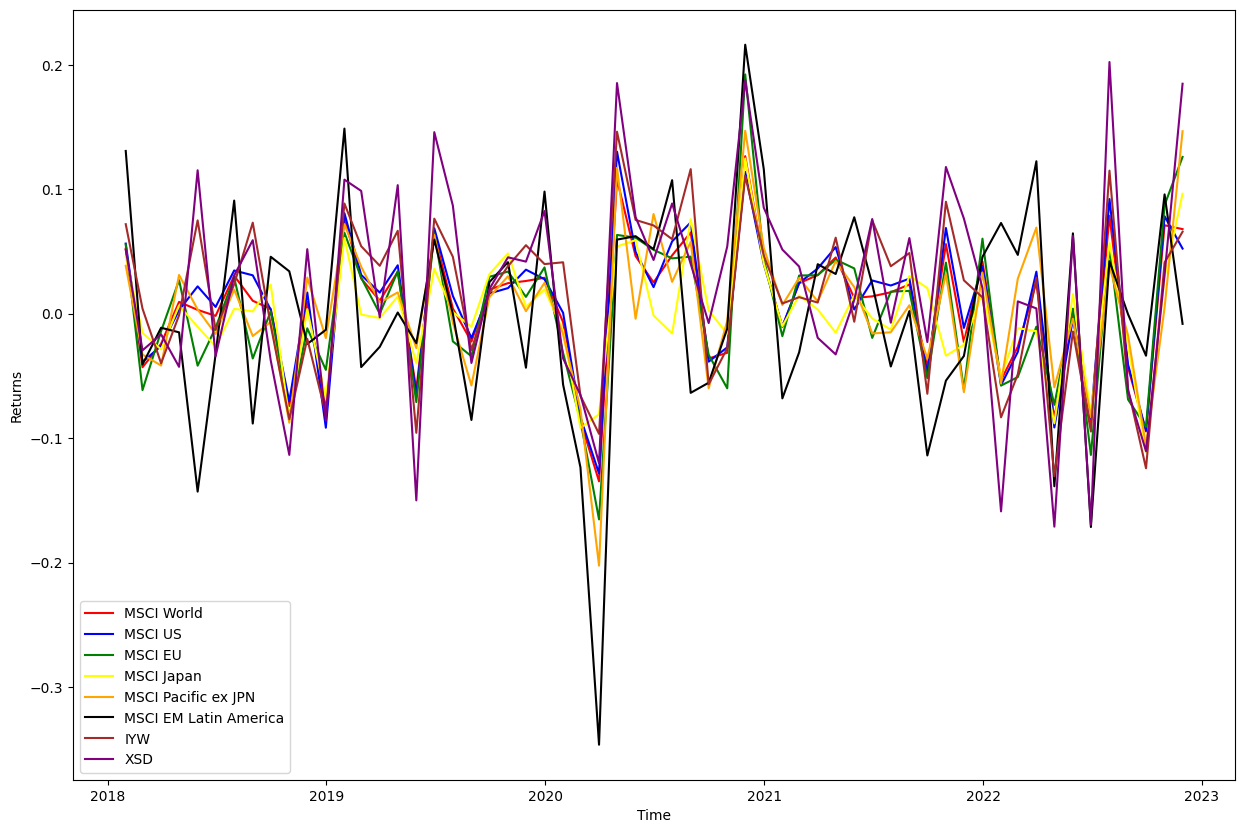

In [73]:
# Set the colors for the lines
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'black', 'brown', 'purple']

# Create a figure with a subplot
fig, ax = plt.subplots(figsize=(15,10))

# Loop through each column in the dataframe
for i, col in enumerate(df_ret.columns):
    # Plot the data in the column as a line chart, with a label for the legend
    ax.plot(df_ret.index, df_ret[col], color = colors[i], label=col)

# Add a legend to the plot
ax.legend()

# Set the labels for the x and y axes
ax.set_xlabel('Time')
ax.set_ylabel('Returns')

# Show the plot
plt.show()

In [74]:
#Create a single dataframe with all the prices for each index
df = pd.merge(world_df, price_df, on='Date')
df.head()

,.MIWO00000PUS,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Date,,,,,,,,
2017-12-31,2103.45,2544.58,439.048,3435.119,6382.282,2828.146,40.6925,69.81
2018-01-31,2213.24,2687.942,463.474,3592.392,6628.286,3197.957,43.62,73.4
2018-02-28,2117.99,2583.866,435.033,3537.143,6410.806,3067.524,43.7975,71.24
2018-03-31,2066.85,2516.933,428.939,3435.606,6144.015,3032.91,42.0525,70.06
2018-04-30,2086.51,2524.279,440.501,3458.471,6335.345,2987.533,42.0025,67.07


In [75]:
# Rename the columns of the dataframe
df_graph = df.rename(columns={'.MIWO00000PUS': 'MSCI World', 
                        '.dMIUS00000PUS': 'MSCI US', 
                        '.dMIEC00000PUS': 'MSCI EU',
                        '.dMIJP00000PUS': 'MSCI Japan',
                        '.dMIPCJ0000NUS': 'MSCI Pacific ex JPN',
                        '.dMILA00000PUS': 'MSCI EM Latin America'
                        })

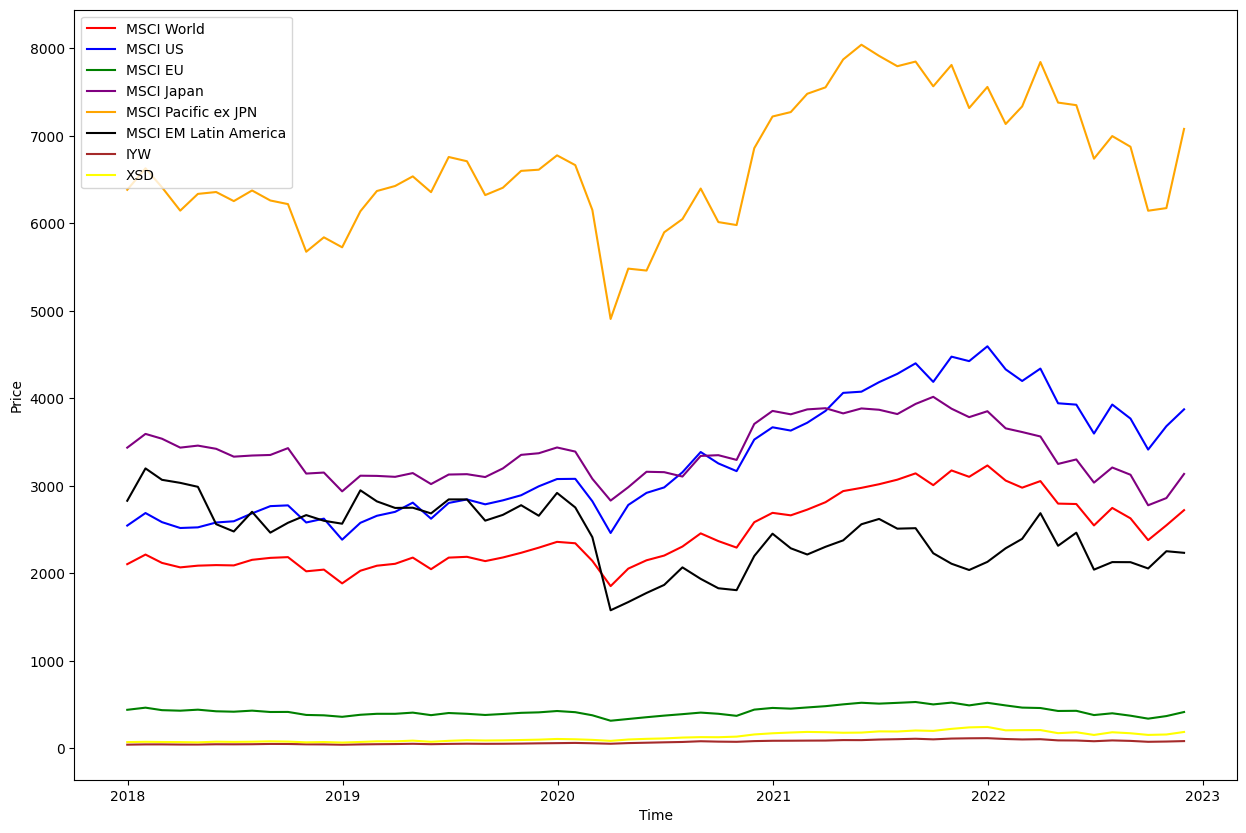

In [76]:
# Set the colors for the lines
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'brown', 'yellow']

# Create a figure with a subplot
fig, ax = plt.subplots(figsize=(15,10))

# Loop through each column in the dataframe
for i, col in enumerate(df_graph.columns):
    # Plot the data in the column as a line chart, with a label for the legend
    ax.plot(df_graph.index, df_graph[col], color = colors[i], label=col)

# Add a legend to the plot
ax.legend()

# Set the labels for the x and y axes
ax.set_xlabel('Time')
ax.set_ylabel('Price')

# Show the plot
plt.show()

In [77]:
# Set the benchmark column
benchmark = '.MIWO00000PUS'

# Create an empty dictionary to store the regression results
results = {}

# Iterate over the columns in the data frame
for col in df.columns:
    if col == benchmark:
        continue
    # Set the X and y values for the linear regression model
    X = df[benchmark].values.reshape(-1, 1)
    y = df[col].values.reshape(-1, 1)

    # Fit the linear regression model
    model = LinearRegression().fit(X, y)

    # Store the regression results in the dictionary
    results[col] = {'Beta': model.coef_[0][0]}

# Print the regression results
print(results)

{'.dMIUS00000PUS': {'Beta': 1.6899288012762284}, '.dMIEC00000PUS': {'Beta': 0.10420198815752578}, '.dMIJP00000PUS': {'Beta': 0.5891002707752655}, '.dMIPCJ0000NUS': {'Beta': 1.614767156072868}, '.dMILA00000PUS': {'Beta': -0.24346324656633725}, 'IYW': {'Beta': 0.05731374455905482}, 'XSD': {'Beta': 0.13318448898126914}}


In [78]:
#Transform the dictionary into a dataframe
beta_df = pd.DataFrame.from_dict(results)

In [79]:
beta_df.head()

,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Beta,1.689929,0.104202,0.5891,1.614767,-0.243463,0.057314,0.133184


In [80]:
#Calculate monthly returns
monthly_stats_df = stats_df * 12
monthly_world_stats_df = world_stats_df * 12

In [81]:
#Merge the monthly statistics into one data frame
statistics_df = monthly_world_stats_df.join(monthly_stats_df)
statistics_df.head()

,.MIWO00000PUS,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Mean,0.068814,0.103387,0.010039,-0.006287,0.041332,0.002425,0.167132,0.246879
Standard Deviation,0.628476,0.653517,0.734059,0.546612,0.696769,1.070088,0.782333,1.059431


In [82]:
#Create a final df with mean, standard deviation, and beta
df_with_beta = pd.concat([statistics_df, beta_df], ignore_index=True)
df_with_beta.index = ['Mean', 'Standard Deviation', 'Beta']
df_with_beta.at['Beta', '.MIWO00000PUS'] = 1.000000

In [83]:
df_with_beta.head()

,.MIWO00000PUS,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Mean,0.068814,0.103387,0.010039,-0.006287,0.041332,0.002425,0.167132,0.246879
Standard Deviation,0.628476,0.653517,0.734059,0.546612,0.696769,1.070088,0.782333,1.059431
Beta,1.000000,1.689929,0.104202,0.589100,1.614767,-0.243463,0.057314,0.133184


In [84]:
# Calculate the risk premium
risk_premiums = {}
for col, rms in monthly_stats_df.items():
    rm = monthly_stats_df.loc['Mean', col]
    risk_premium = rm - rf
    risk_premiums[col] = {'Risk Premium': risk_premium}
rp_df = pd.DataFrame.from_dict(risk_premiums)
rp_df.head()

,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Risk Premium,0.064787,-0.028561,-0.044887,0.002732,-0.036175,0.128532,0.208279


In [85]:
#Create a single dataframe
df_with_rp = pd.concat([df_with_beta, rp_df], ignore_index=True)
df_with_rp.index = ['Mean', 'Standard Deviation', 'Beta', 'Risk Premium']

In [86]:
df_with_rp.head()

,.MIWO00000PUS,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Mean,0.068814,0.103387,0.010039,-0.006287,0.041332,0.002425,0.167132,0.246879
Standard Deviation,0.628476,0.653517,0.734059,0.546612,0.696769,1.070088,0.782333,1.059431
Beta,1.000000,1.689929,0.104202,0.589100,1.614767,-0.243463,0.057314,0.133184
Risk Premium,NaN,0.064787,-0.028561,-0.044887,0.002732,-0.036175,0.128532,0.208279


In [87]:
#Calculate the expected retuns and create a single dataframe
expected_returns = {}
for col, rms in df_with_rp.items():
    rp = df_with_rp.loc['Risk Premium', col]
    beta = df_with_rp.loc['Beta', col]
    expected_return = rf + beta * rp
    expected_returns[col] = {'Expected Return': expected_return}
df_er = pd.DataFrame.from_dict(expected_returns)
df_with_er = pd.concat([df_with_rp, df_er], ignore_index=True)
df_with_er.index = ['Mean', 'Standard Deviation', 'Beta', 'Risk Premium', 'Expected Return']
df_with_er.head()

,.MIWO00000PUS,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
Mean,0.068814,0.103387,0.010039,-0.006287,0.041332,0.002425,0.167132,0.246879
Standard Deviation,0.628476,0.653517,0.734059,0.546612,0.696769,1.070088,0.782333,1.059431
Beta,1.000000,1.689929,0.104202,0.589100,1.614767,-0.243463,0.057314,0.133184
Risk Premium,NaN,0.064787,-0.028561,-0.044887,0.002732,-0.036175,0.128532,0.208279
Expected Return,NaN,0.148085,0.035624,0.012157,0.043012,0.047407,0.045967,0.066339


In [88]:
df_with_er = df_with_er.rename(columns={'.MIWO00000PUS': 'MSCI World', 
                        '.dMIUS00000PUS': 'MSCI US', 
                        '.dMIEC00000PUS': 'MSCI EU',
                        '.dMIJP00000PUS': 'MSCI Japan',
                        '.dMIPCJ0000NUS': 'MSCI Pacific ex JPN',
                        '.dMILA00000PUS': 'MSCI EM Latin America'
                        })

In [89]:
df_with_er.head()

,MSCI World,MSCI US,MSCI EU,MSCI Japan,MSCI Pacific ex JPN,MSCI EM Latin America,IYW,XSD
Mean,0.068814,0.103387,0.010039,-0.006287,0.041332,0.002425,0.167132,0.246879
Standard Deviation,0.628476,0.653517,0.734059,0.546612,0.696769,1.070088,0.782333,1.059431
Beta,1.000000,1.689929,0.104202,0.589100,1.614767,-0.243463,0.057314,0.133184
Risk Premium,NaN,0.064787,-0.028561,-0.044887,0.002732,-0.036175,0.128532,0.208279
Expected Return,NaN,0.148085,0.035624,0.012157,0.043012,0.047407,0.045967,0.066339


In [90]:
#Adaptations to run the simulation in order to create the efficient frontier
means3 = stats_df.iloc[0]
means_3cols = means3.iloc[:3]
mean_3returns = means_3cols.tolist()
beta3 = beta_df.iloc[0]
beta_3cols = beta3.iloc[:3]
returns_3index_df = returns_df.iloc[:, :3]
cov_3 = returns_3index_df.cov()
ticks = ['.dMIUS00000PUS', '.dMIEU00000PUS', '.dMIJP00000PUS']

In [91]:
# Display the data frame as a table
display(cov_3.style.apply(highlight_max))

,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS
.dMIUS00000PUS,0.002966,0.002944,0.002029
.dMIEC00000PUS,0.002944,0.003742,0.002353
.dMIJP00000PUS,0.002029,0.002353,0.002075


In [92]:
def calc_portfolio_perf(weights, mean_3returns, cov_3, rf):
    portfolio_return = np.sum(mean_3returns * weights) * 12
    portfolio_var = np.dot(np.transpose(weights), np.dot(cov_3, weights)) 
    portfolio_std = np.sqrt(portfolio_var) * 12
    sharpe_ratio = portfolio_return / portfolio_std
    beta = np.sum(beta_3cols * weights)
    return portfolio_return, portfolio_std, sharpe_ratio, beta
def simulate_random_portfolios(num_portfolios, mean_3returns, cov_3, rf):
    results_matrix = np.zeros((len(mean_3returns)+4, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_3returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio, beta = calc_portfolio_perf(weights, mean_3returns, cov_3, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        results_matrix[3,i] = beta
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+4,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe', 'beta'] + [tick for tick in ticks])
        
    return results_df

In [93]:
#Simulation for efficient frontier for the US, EU, JPN markets
num_portfolios = 500000
results_frame_3 = simulate_random_portfolios(num_portfolios, mean_3returns, cov_3, rf)

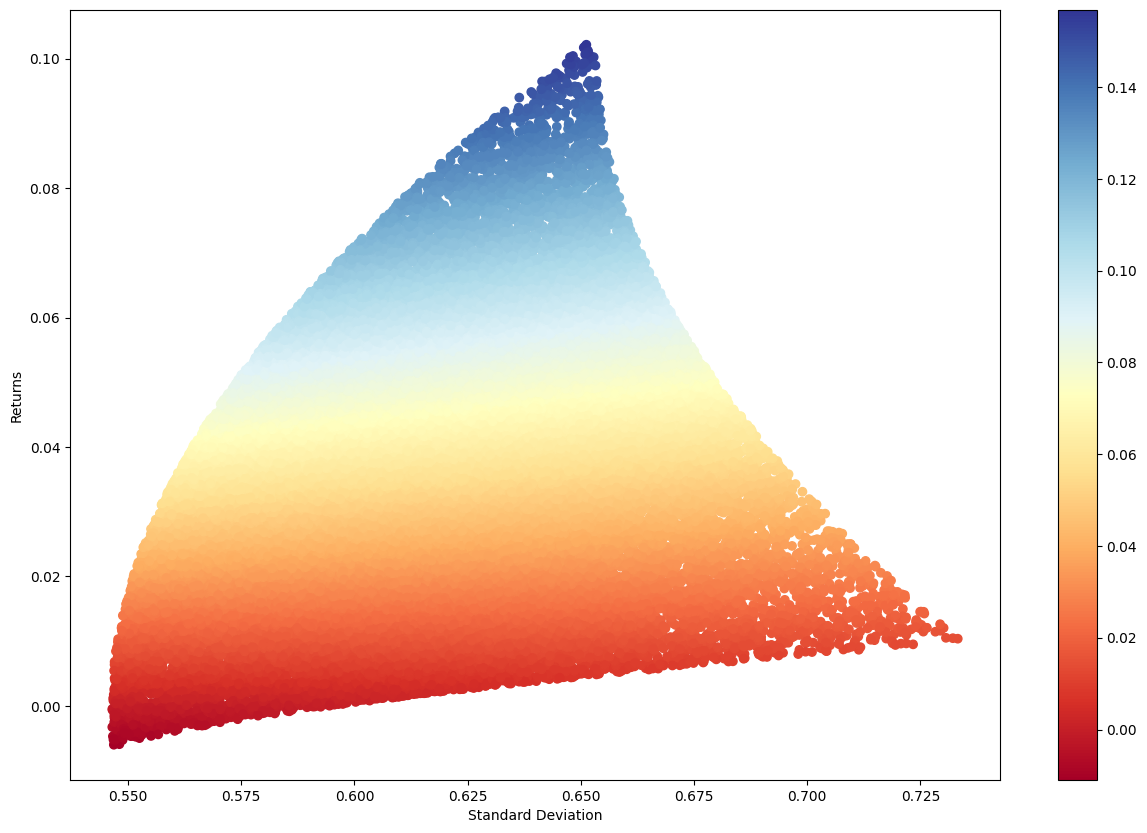

In [94]:
#Plot an efficient frontier for the US, EU, JPN markets (coloured by sharpe ratio)
plt.subplots(figsize=(15,10))
plt.scatter(results_frame_3.stdev,results_frame_3.ret,c=results_frame_3.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()

In [95]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port_3 = results_frame_3.iloc[results_frame_3['sharpe'].idxmax()]
#Locate positon of portfolio with minimum standard deviation
min_vol_port_3 = results_frame_3.iloc[results_frame_3['stdev'].idxmin()]
#Locate positon of portfolio with maximum standard deviation
max_vol_port_3 = results_frame_3.iloc[results_frame_3['stdev'].idxmax()]
#Locate positon of portfolio with maximum return
max_ret_port_3 = results_frame_3.iloc[results_frame_3['ret'].idxmax()]
#Locate positon of portfolio with maximum return
max_beta_port_3 = results_frame_3.iloc[results_frame_3['beta'].idxmax()]

In [96]:
max_sharpe_port_3.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEU00000PUS,.dMIJP00000PUS
20491,0.102131,0.651227,0.156829,1.67709,0.988499,0.000366,0.011135


In [97]:
min_vol_port_3.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEU00000PUS,.dMIJP00000PUS
1394,-0.003256,0.546542,-0.005957,0.618173,0.02733,0.002088,0.970582


In [98]:
max_vol_port_3.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEU00000PUS,.dMIJP00000PUS
14540,0.010392,0.733243,0.014173,0.110767,0.003909,0.995336,0.000754


In [99]:
max_ret_port_3.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEU00000PUS,.dMIJP00000PUS
20491,0.102131,0.651227,0.156829,1.67709,0.988499,0.000366,0.011135


In [100]:
#Adaptations to run the simulation in order to create the efficient frontier
means = stats_df.iloc[0]
mean_returns = means.tolist()

In [101]:
def calc_portfolio_perf(weights, mean_returns, vcov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 12
    portfolio_var = np.dot(np.transpose(weights), np.dot(vcov, weights))
    portfolio_std = np.sqrt(portfolio_var) * 12
    sharpe_ratio = portfolio_return / portfolio_std
    beta = np.sum(beta_df.loc['Beta'] * weights)
    return portfolio_return, portfolio_std, sharpe_ratio, beta
def simulate_random_portfolios(num_portfolios, mean_returns, vcov, rf):
    results_matrix = np.zeros((len(mean_returns)+4, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio, beta = calc_portfolio_perf(weights, mean_returns, vcov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        results_matrix[3,i] = beta
        #Iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+4,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe', 'beta'] + [tick for tick in tickers])
        
    return results_df

In [102]:
#Simulation for efficient frontier
num_portfolios = 500000
results_frame = simulate_random_portfolios(num_portfolios, mean_returns, vcov, rf)

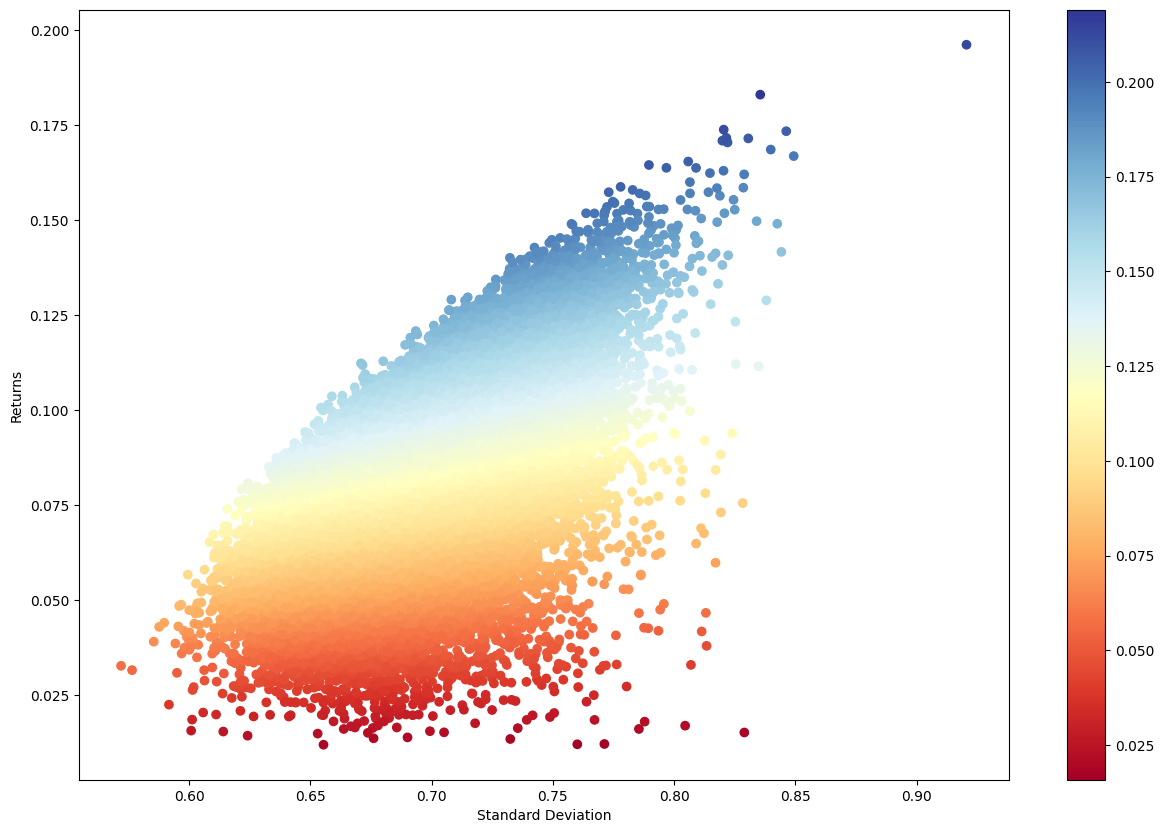

In [103]:
#Plot an efficient frontier for the entire portfolio (coloured by sharpe ratio)
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()

In [104]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#Locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#Locate positon of portfolio with maximum standard deviation
max_vol_port = results_frame.iloc[results_frame['stdev'].idxmax()]
#Locate positon of portfolio with maximum return
max_ret_port = results_frame.iloc[results_frame['ret'].idxmax()]
#Locate positon of portfolio with maximum beta
max_beta_port = results_frame.iloc[results_frame['beta'].idxmax()]

In [105]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
29001,0.183006,0.835551,0.219024,0.2887,0.113635,0.029513,0.001963,0.01181,0.021509,0.406224,0.415346


In [106]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
9777,0.032806,0.571924,0.05736,0.867618,0.19146,0.029433,0.582571,0.121692,0.013079,0.049303,0.012463


In [107]:
max_vol_port.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
13509,0.196131,0.920613,0.213044,0.263801,0.012591,0.053685,0.000253,0.090935,0.039226,0.09883,0.70448


In [108]:
max_ret_port.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
13509,0.196131,0.920613,0.213044,0.263801,0.012591,0.053685,0.000253,0.090935,0.039226,0.09883,0.70448


In [109]:
max_beta_port.to_frame().T

,ret,stdev,sharpe,beta,.dMIUS00000PUS,.dMIEC00000PUS,.dMIJP00000PUS,.dMIPCJ0000NUS,.dMILA00000PUS,IYW,XSD
17660,0.067491,0.633534,0.106531,1.379451,0.399389,0.044622,0.108293,0.39165,0.002806,0.03644,0.016799
